### Pandemic Market Analytics

Before we delve into the impacts of the COVID-19 epidemic on financial markets, we have already seen some:

- Business closures and factory shutdowns

- Rising unemployment rate

- Supply chain disruption

- Shortage of daily necessities

- Increased pressure on the medical system

- Exponential increase in infections and deaths

and more...

Today's market is more risky than it was 10 years ago and everything is more closely connected in this globalization era. This is also reflected in the financial markets.

This notebook serves as a reference for the market analysis in current COVID-19 context. It analyzes the stock market data from yahoo finance and drwa on past epidemics data to provide key insights into the market situation during pandemic outbreak. For example, how COVID-19 will affect the financial markets, how much the stock market will fall, when and how it will end. 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [2]:
# example of getting S&P data from yahoo finance
data_sp = pdr.get_data_yahoo('^GSPC', '01-Nov-19')
data_sp.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-31,3046.899902,3023.189941,3046.899902,3037.560059,4139280000,3037.560059
2019-11-01,3066.949951,3050.719971,3050.719971,3066.909912,3930200000,3066.909912
2019-11-04,3085.199951,3074.870117,3078.959961,3078.270020,4146850000,3078.270020
2019-11-05,3083.949951,3072.149902,3080.800049,3074.620117,4486130000,3074.620117
2019-11-06,3078.340088,3065.889893,3075.100098,3076.780029,4458190000,3076.780029


In [3]:
# calculating the percent change of closing price
data_pc = data_sp.Close.pct_change()
data_pc.head()

Date
2019-10-31         NaN
2019-11-01    0.009662
2019-11-04    0.003704
2019-11-05   -0.001186
2019-11-06    0.000702
Name: Close, dtype: float64

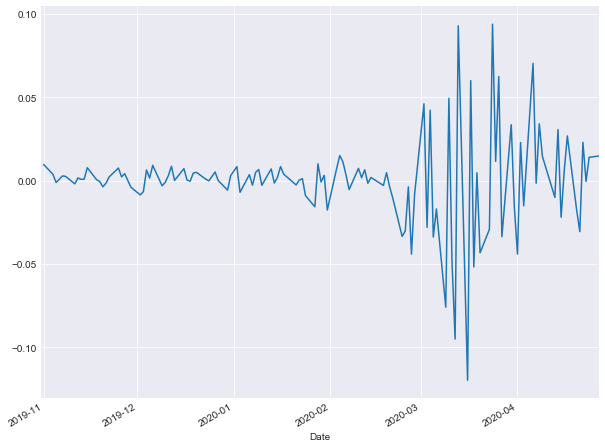

In [4]:
data_pc.plot(figsize=(10, 8), grid=True)

Although the first case in Wuhan was found in mid-December-ish and China had implemented lockdown on January 23rd, the stock market actually started volatile movement from Feburary onwards and reached its peak in mid-March.

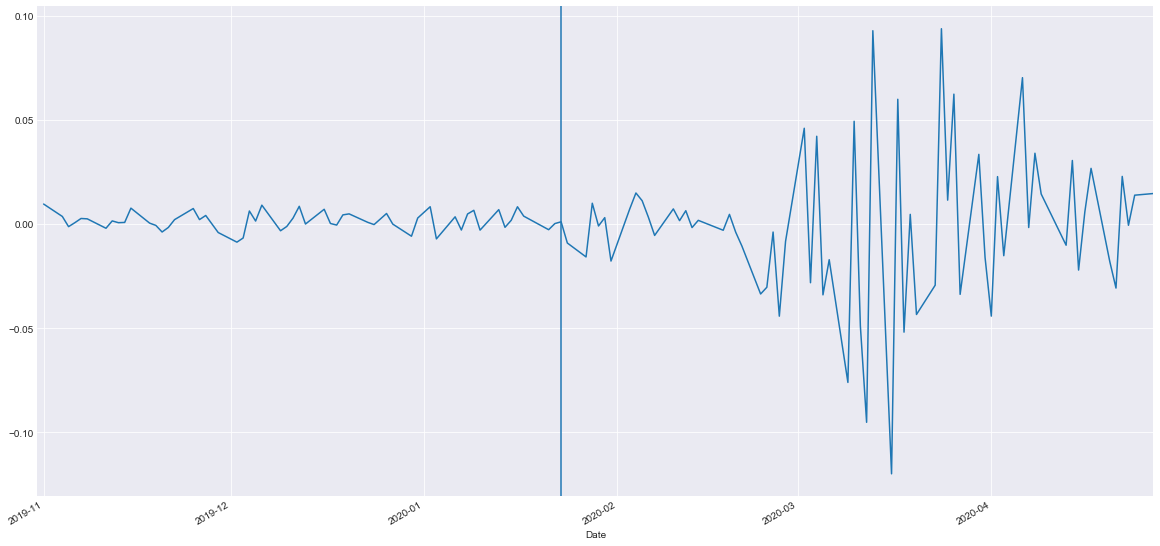

In [5]:
data_pc.plot(figsize=(20, 10), grid=True)
plt.axvline('23-Jan-20') # the date of Wuhan lockdown
plt.show()

In [6]:
## load pandemic timelines data
timelines = pd.read_csv("./data/pandemic_timeline.csv")
timelines

,pandemic_name,first_case,who_emergency,pandemic_declaration,last_date,Unnamed: 5
0,covid19,11/17/19,1/30/20,3/11/20,7/31/20,NaN
1,SARS,11/16/02,3/26/03,3/26/03,7/5/03,NaN
2,Swine Flu,4/15/09,4/25/09,6/11/09,8/11/10,NaN
3,Hong Kong Flu,7/1/68,9/30/68,9/30/68,12/31/70,NaN
4,Asian Flu,2/28/57,6/30/57,6/30/57,12/31/58,NaN
5,EBOLA,12/1/13,8/8/14,8/8/14,1/14/16,NaN
6,WWII,9/1/39,9/1/39,9/1/39,9/2/45,NaN


In [7]:
colNames = timelines.columns
colNames

Index(['pandemic_name', 'first_case', 'who_emergency', 'pandemic_declaration',
       'last_date', 'Unnamed: 5'],
      dtype='object')

In [8]:
coln_list = timelines.columns.tolist()
coln_list = coln_list[:5]

In [9]:
timelines = pd.DataFrame(timelines, columns = coln_list)
timelines

,pandemic_name,first_case,who_emergency,pandemic_declaration,last_date
0,covid19,11/17/19,1/30/20,3/11/20,7/31/20
1,SARS,11/16/02,3/26/03,3/26/03,7/5/03
2,Swine Flu,4/15/09,4/25/09,6/11/09,8/11/10
3,Hong Kong Flu,7/1/68,9/30/68,9/30/68,12/31/70
4,Asian Flu,2/28/57,6/30/57,6/30/57,12/31/58
5,EBOLA,12/1/13,8/8/14,8/8/14,1/14/16
6,WWII,9/1/39,9/1/39,9/1/39,9/2/45


In [10]:
for col in timelines.columns[1:]:
    timelines[col] = pd.to_datetime(timelines[col])

In [11]:
timelines

,pandemic_name,first_case,who_emergency,pandemic_declaration,last_date
0,covid19,2019-11-17,2020-01-30,2020-03-11,2020-07-31
1,SARS,2002-11-16,2003-03-26,2003-03-26,2003-07-05
2,Swine Flu,2009-04-15,2009-04-25,2009-06-11,2010-08-11
3,Hong Kong Flu,2068-07-01,2068-09-30,2068-09-30,1970-12-31
4,Asian Flu,2057-02-28,2057-06-30,2057-06-30,2058-12-31
5,EBOLA,2013-12-01,2014-08-08,2014-08-08,2016-01-14
6,WWII,2039-09-01,2039-09-01,2039-09-01,2045-09-02


In [12]:
# use major mkt indicators: S&P500, crude oil, gold, and treasury bond
def get_data(tl):    
    inst_list = ['^GSPC', 'CL=F','GC=F', 'TLT'] 
    data = pd.DataFrame()
    
    for inst in inst_list:
        try:
            data[inst] = pdr.get_data_yahoo(inst, tl.first_case.iloc[0]-timedelta(days=30), 
                                        tl.last_date.iloc[0]+timedelta(days=365))['Adj Close']    
        except Exception as e:
            print('No data available for ', inst, e)

    return data

In [13]:
# fetch data for covid-19 
covid_timelines = timelines.loc[timelines.pandemic_name=='covid19']
data= get_data(covid_timelines)
data.head(10).append(data.tail(10))

,^GSPC,CL=F,GC=F,TLT
Date,,,,
2019-10-17,2997.949951,53.930000,1492.300049,138.241058
2019-10-18,2986.199951,53.779999,1488.199951,138.241058
2019-10-21,3006.719971,53.310001,1482.400024,137.201126
2019-10-22,2995.989990,54.160000,1481.699951,138.003357
2019-10-23,3004.520020,55.970001,1489.900024,138.141998
2019-10-24,3010.290039,56.230000,1498.900024,137.864716
2019-10-25,3022.550049,56.660000,1499.500000,137.191223
2019-10-28,3039.419922,55.810001,1490.000000,135.943268
2019-10-29,3036.889893,55.540001,1487.000000,136.032455


#### Plot daily pct change in key indicators

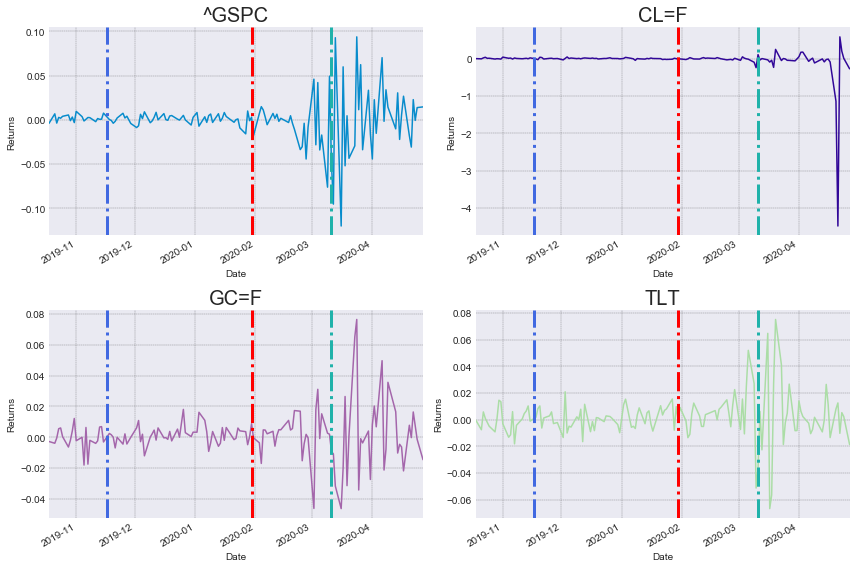

In [14]:
def plot_daily_pc(data, tl):
    data_pc = data.pct_change().dropna()
    fig = plt.figure(figsize=(12, 8))
    i = 0
    
    for col in data_pc.columns:
        # add the subplot
        sub = fig.add_subplot(2, 2, i+1)
        i = i+1
        # set title
        sub.set_title(col, fontsize=20)
        # plot
        r = random.random()
        b = random.random()
        g = random.random()
        data_pc[col].plot(color=(r, g, b))
        sub.set_ylabel('Returns')
        sub.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
        sub.axvline(x=tl.first_case.iloc[0], color='RoyalBlue',
                    linestyle='dashdot', linewidth=3)
        sub.axvline(x=tl.who_emergency.iloc[0], color='Red',
                    linestyle='dashdot', linewidth=3)  # date of WHO emergency declaration
        sub.axvline(x=tl.pandemic_declaration.iloc[0], color='LightSeaGreen',
                    linestyle='dashdot', linewidth=3)  # date of WHO pandemic declaration

    plt.tight_layout()
    plt.show()
    
plot_daily_pc(data, covid_timelines)

Normally, the daily pct change of S&P500 is almost near zero, and we can see the volatility change dramatically in the days after the red line, when the WHO declared a state of emergency, and escalated at green line, indicating the pandemic declaration. The same trend is shown in crude oil, gold and 20-year treasury bond as well.

However the above graphs are good to know the market volatility yet not good for quantifying the real impact or to predict the trend of the market movement. After all, we are more interested in the actual gain and loss.

#### Plot cumulative returns

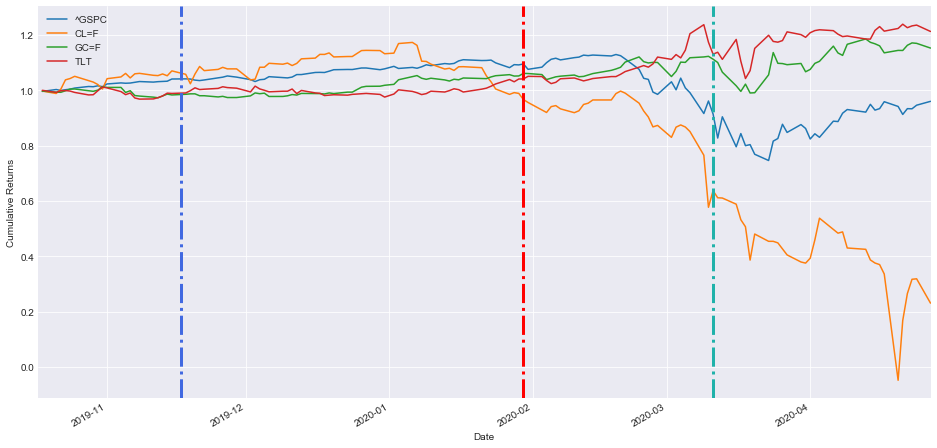

In [16]:
def plot_cumulative_returns(data,tl):
    data_cum_ret = (data.pct_change()+1).cumprod()
    data_cum_ret.plot(figsize=(16,8),grid=True)
    plt.legend(loc='best')
    plt.ylabel('Cumulative Returns')
    plt.axvline(x=tl.first_case.iloc[0], color='RoyalBlue',
                linestyle='dashdot', linewidth=3)
    plt.axvline(x=tl.who_emergency.iloc[0], color='Red',
                linestyle='dashdot', linewidth=3)
    plt.axvline(x=tl.pandemic_declaration.iloc[0], color='LightSeaGreen',
                linestyle='dashdot', linewidth=3)
    plt.axvspan(tl.last_date.iloc[0], tl.last_date.iloc[0]+timedelta(days=365),
                color='dodgerblue', alpha=0.2) # save for later use on past epdidemics
    plt.show()
    
plot_cumulative_returns(data, covid_timelines)

The pandemic obviously has impact on cumulative returns for these indicators; the relatively slight ones are gold and treasury bond, moderate impact on stock market as it recovered partially after a temporary steep downward trend. 

The **crude oil** in **orange line** seems to be the most affected as the downward trend remains to be sharp and constant unless the wrangling of global oil giants ends.

#### Plot drawdown graphs

Another way is to plot drawdown graph. It simply measures the number of times declining from the peak in any given period of time. 

In [17]:
def calc_drawdown(data, tl):
    data_cum_ret = (data.pct_change()+1).cumprod()
    cum_rets = data_cum_ret.loc[tl.first_case.iloc[0]:tl.last_date.iloc[0]]
    # calculate the running maximum
    running_max = np.maximum.accumulate(cum_rets.dropna())
    # ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # calculate the percentage drawdown
    drawdown = (cum_rets)/running_max - 1
    return drawdown


def plot_drawdown(drawdown, tl):
    fig = plt.figure(figsize=(12, 8))
    i = 0
    for col in drawdown.columns:
        sub = fig.add_subplot(2, 2, i+1)
        i = i+1
        sub.set_title(col, fontsize=20)

        drawdown[col].plot(color='r')
        sub.set_ylabel('Returns')
        sub.fill_between(drawdown.index, drawdown[col], color='red')
        sub.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
        sub.axvline(x=tl.first_case.iloc[0], color='RoyalBlue',
                    linestyle='dashdot', linewidth=3)
        sub.axvline(x=tl.who_emergency.iloc[0], color='red',
                    linestyle='dashdot', linewidth=3)

    plt.tight_layout()
    plt.show()

^GSPC    -33.924960
CL=F    -104.109372
GC=F     -11.804018
TLT      -15.727707
dtype: float64


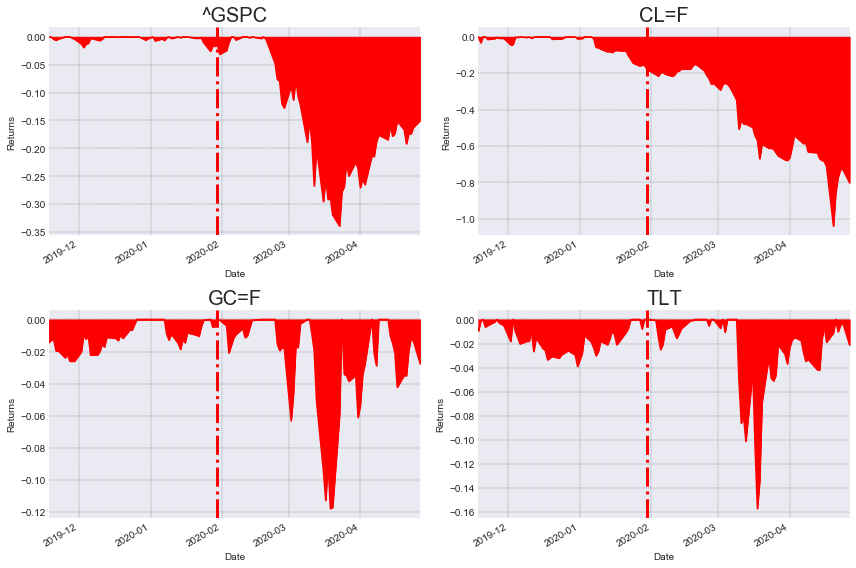

In [18]:
# data.columns = ['SP500','Crude Oil', 'Gold', 'TLT']
drawdown = calc_drawdown(data, covid_timelines)
# find the maximum drawdowns
print(drawdown.min()*100)
# plt.style.use('seaborn-darkgrid')
plot_drawdown(drawdown, covid_timelines)

The results of maximum drawdown graphs correspond to the previous cumulative returns. For the most affected S&P500 is approximatelty 34%, for crude oil is 104%. On the other hand, gold and treasury bond have suffered several declines yet the overall impact on returns is moderate. 

#### Plot scatter plot

Now take a look at scatter plot and correlation plot to understand the relationships between different indictors.

Correlation           ^GSPC      CL=F      GC=F       TLT
^GSPC  1.000000  0.097806  0.126384 -0.500178
CL=F   0.097806  1.000000  0.028415 -0.037140
GC=F   0.126384  0.028415  1.000000  0.072734
TLT   -0.500178 -0.037140  0.072734  1.000000


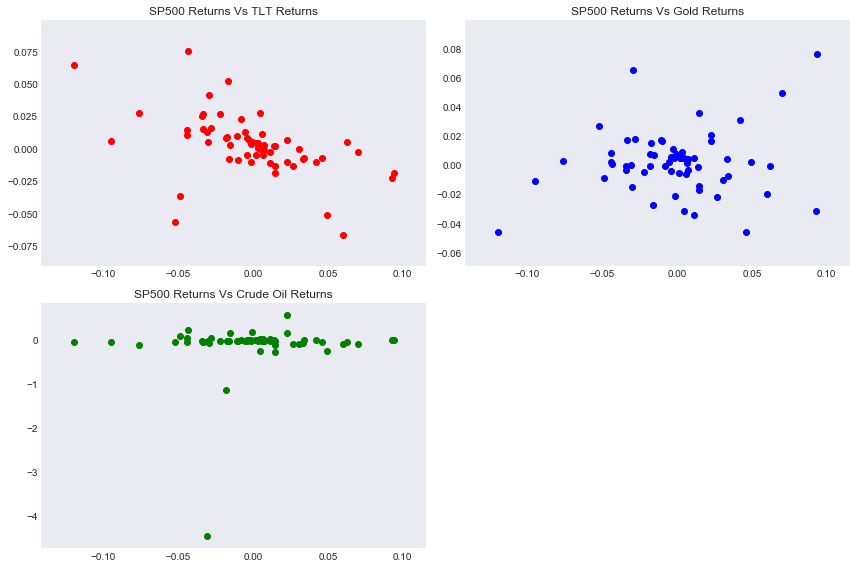

In [19]:
def plot_scatter(data, tl):
    data_pc = data.pct_change().dropna()
    temp = data_pc.loc[tl.who_emergency.iloc[0]:tl.last_date.iloc[0]]

    fig = plt.figure(figsize=(12, 8))

    sub = fig.add_subplot(2, 2, 1)
    sub.scatter(temp['^GSPC'],temp['TLT'],color='red')
    sub.set_title('SP500 Returns Vs TLT Returns')
    sub.grid()

    sub = fig.add_subplot(2, 2, 2)
    sub.scatter(temp['^GSPC'],temp['GC=F'],color='blue')
    sub.set_title('SP500 Returns Vs Gold Returns')
    sub.grid()

    sub = fig.add_subplot(2, 2, 3)
    sub.scatter(temp['^GSPC'],temp['CL=F'],color='green')
    sub.set_title('SP500 Returns Vs Crude Oil Returns')
    sub.grid()
    
    # correlation
    sum_corr = data_pc[data_pc.columns].corr()
    print('Correlation',sum_corr)


    plt.tight_layout()
    plt.show()
    
plot_scatter(data,covid_timelines)

For the first plot, there seems to be an inverse relationship between stock market and treasury bond. Combining some extra financial knowledge, we know this holds true as when the economy slows down, the Fed would step in to cut  rates. Since there is an inverse relationship between rates and prices, lower rates lead to higher prices. 

However, we cannot really draw the conclusions due to the limited data we have. Same for the other two plots.

#### Correlation plot

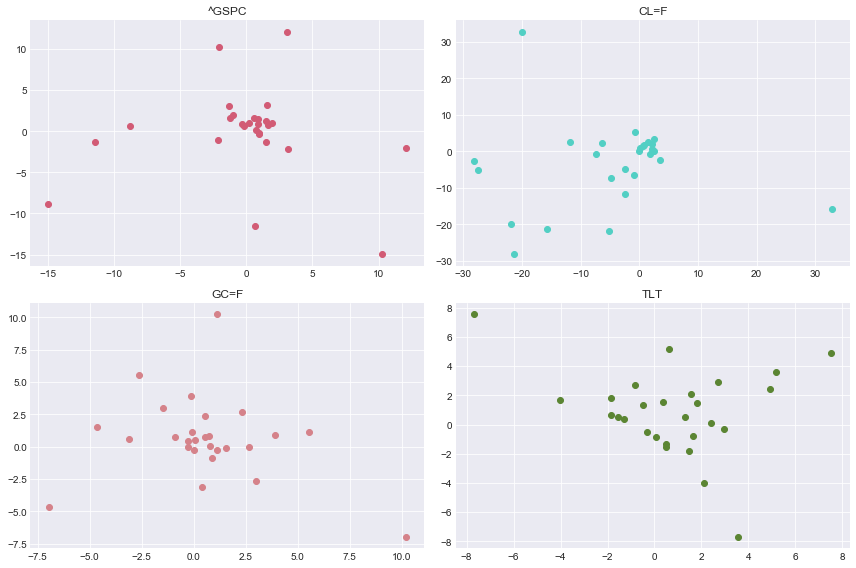

In [21]:
def plot_auto_correlation(data, tl):
    data_pc = data.resample('W').ffill().pct_change()*100
    fig = plt.figure(figsize=(12, 8))
    i=1
    
    for col in data_pc.columns:        
        sub = fig.add_subplot(2, 2, i)
        i=i+1
        r = random.random()
        b = random.random()
        g = random.random()        
        sub.scatter(data_pc.loc[:,col], data_pc.shift(1).loc[:,col], color=(r,g,b))
        sub.set_title(col)
    plt.tight_layout()
    plt.show()
    
plot_auto_correlation(data, covid_timelines)

The correlation plot is a common way of exploring relationships between different data and is extremely popular in finance to build a diversified portfolio in volatile markets.

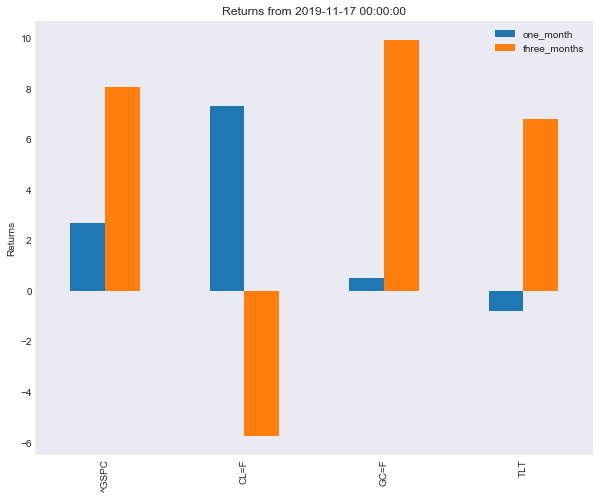

In [22]:
def calc_returns(data,first_date):
    returns = pd.DataFrame(index=data.columns)
    data = data.loc[first_date:]
    try:
        returns['one_month'] = (data.iloc[22]/data.iloc[0]-1)*100
        returns['three_months'] = (data.iloc[63]/data.iloc[0]-1)*100
        returns['six_months'] = (data.iloc[126]/data.iloc[0]-1)*100
        returns['one_year'] = (data.iloc[252]/data.iloc[0]-1)*100        
    except:
        pass
    returns.plot.bar(figsize=(10,8))
    plt.ylabel('Returns')
    plt.title('Returns from '+str(first_date))
    plt.grid()
    plt.show()
    return returns

first_case_date = covid_timelines.first_case.iloc[0]
r = calc_returns(data,first_case_date)

With regard to S&P500, it only reflects the whole stock market movement, what if we are interested in processing and analyzing granular data. Below shows an example to look at differnet performance of various sectors that make up the S&P500 index.

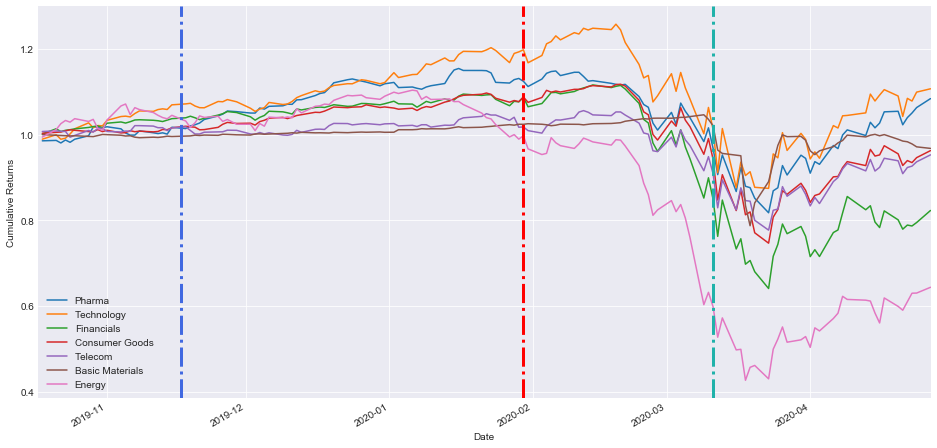

In [23]:
def plot_sector(tl):
    
    sector_list = ['IHE', 'IYW', 'IYF', 'IYK', 'IYZ','ITM', 'IYE']
    columns = ['Pharma', 'Technology', 'Financials', 'Consumer Goods',
               'Telecom', 'Basic Materials', 'Energy']

    sector_data = pd.DataFrame()
    
    for inst in sector_list:
        try:
            sector_data[inst] = pdr.get_data_yahoo(inst, tl.first_case.iloc[0]-timedelta(days=30), 
                                        tl.last_date.iloc[0]+timedelta(days=365))['Adj Close']    
        except:
            pass

    sector_data.columns = columns
    plot_cumulative_returns(sector_data, tl)
    
plot_sector(covid_timelines)

Overall, all sectors move in roughly same direction, but their relative size or degree of decline is different. 
The **Pharmaceuticals** and **Technology** are two sectors that are relatively less affected. 

The **Energy** sector is the most affetced, which makes sense as crude oil suffer the most earlier. Besides, **Financial** sector also suffered huge hit.

In [24]:
def plot_analytics(data, timelines):
    plot_daily_pc(data, timelines)
    plot_cumulative_returns(data, timelines)
    plot_drawdown(drawdown,timelines)    
    first_case_date = timelines.who_emergency.iloc[0]
    
    return calc_returns(data,first_case_date)

#### Post pandemic analysis (one year after the last case)

Take the example of Swine Flu, another global pandemic, below plots the whole market situation movement from the pandemic outbreak from the first case to one year after the last case. It might provide some refrences for COVID-19 development.

---------------------------------
Swine Flu
---------------------------------
---------------------------------
                 ^GSPC       CL=F        GC=F        TLT
Date                                                    
2009-03-16  753.890015  47.349998  921.599976  73.121437
2009-03-17  778.119995  49.160000  916.400024  72.723694
2009-03-18  794.349976  48.139999  888.700012  75.479034
2009-03-19  784.039978  51.610001  958.299988  75.573044
2009-03-20  768.539978  51.060001  955.799988  75.153580
---------------------------------
Drawdowns ^GSPC   -15.994677
CL=F    -21.683550
GC=F    -13.569909
TLT     -14.379870
dtype: float64
---------------------------------


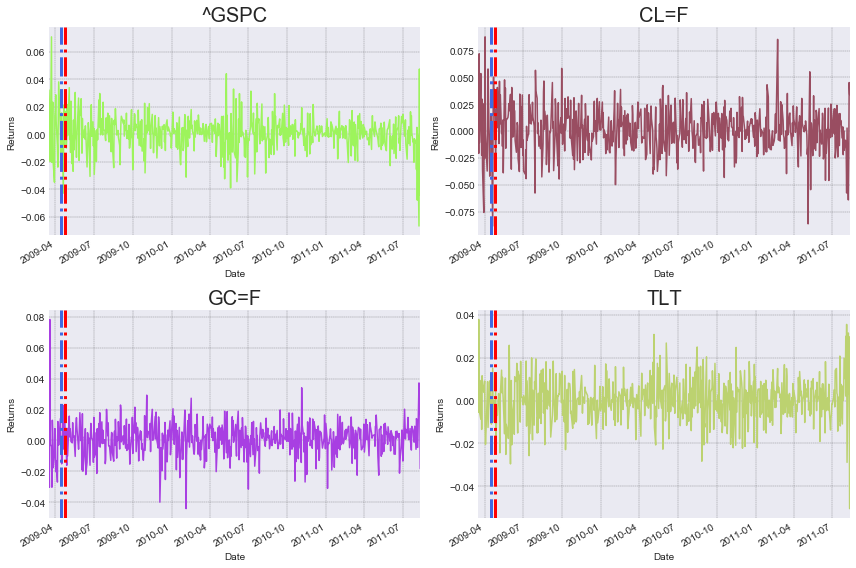

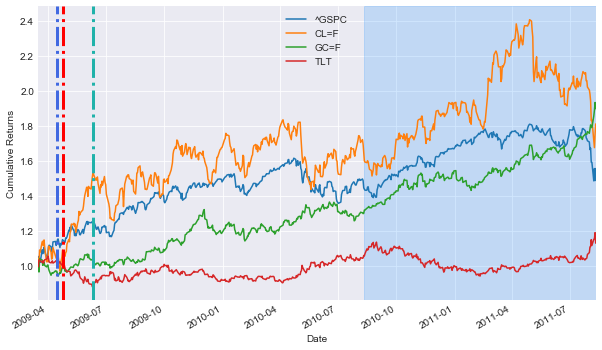

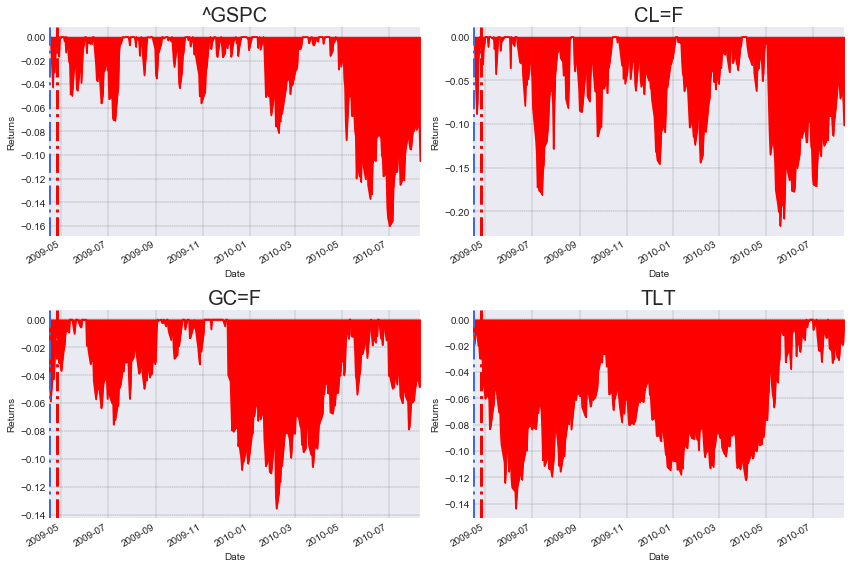

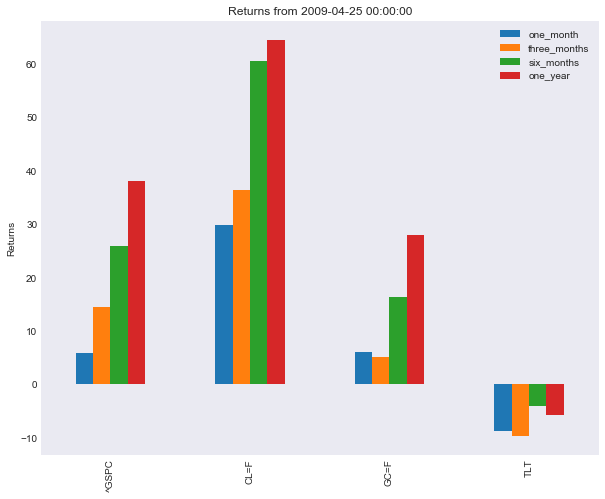

       one_month  three_months  six_months   one_year
^GSPC   5.751537     14.538604   25.899402  38.040367
CL=F   29.796575     36.378137   60.550461  64.419632
GC=F    5.962087      5.058404   16.332372  28.025118
TLT    -8.832858     -9.641926   -4.172855  -5.774440
Correlation           ^GSPC      CL=F      GC=F       TLT
^GSPC  1.000000  0.522562  0.090348 -0.455661
CL=F   0.522562  1.000000  0.334871 -0.292564
GC=F   0.090348  0.334871  1.000000  0.015626
TLT   -0.455661 -0.292564  0.015626  1.000000


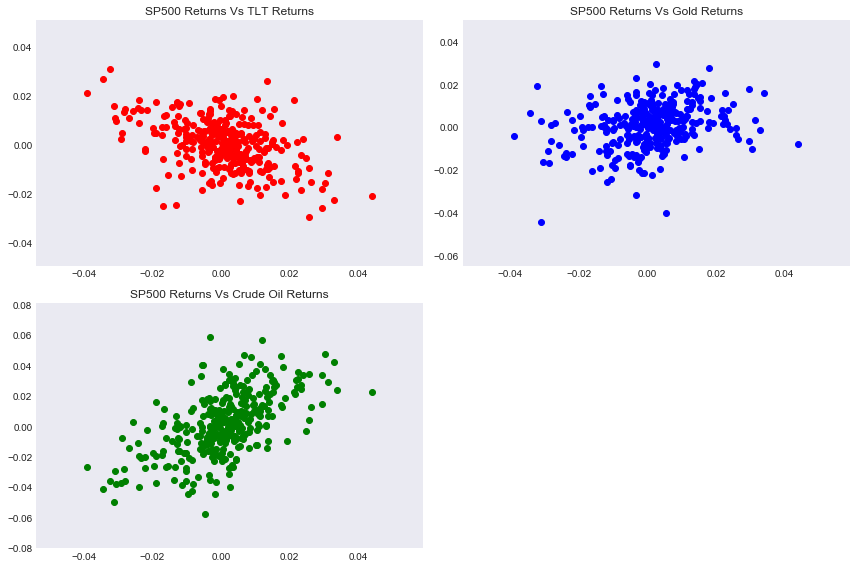

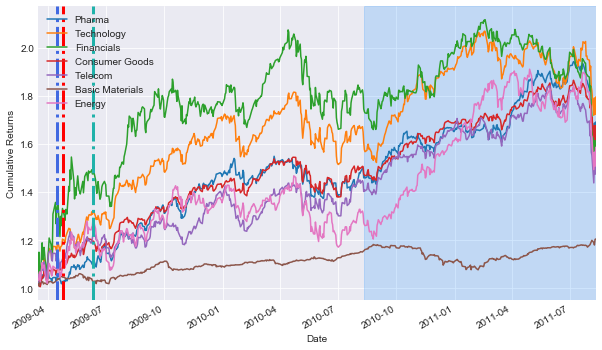

In [96]:
p = 'Swine Flu'
print("---------------------------------")
print(p)
tl = timelines[timelines.pandemic_name == p]

print("---------------------------------")
data = get_data(tl)
print("---------------------------------")
print(data.head())

print("---------------------------------")
drawdown = calc_drawdown(data,tl)
print('Drawdowns', drawdown.min()*100)

print("---------------------------------")
print(plot_analytics(data, tl))
try:
    if data.shape[1] > 1:
        plot_scatter(data,tl)
    plot_sector(tl)
except Exception as e:
    pass

Also look at the analytics for SARS since they both originated in China, which could be more meaningful in some sense. The following timeline helps to understand how the current situation will develop. Notice that SARS happened only in Asia, so it had less impact on some indicators, could use Asian market indictors to analyze.

---------------------------------
SARS
---------------------------------
---------------------------------
                 ^GSPC       CL=F        GC=F        TLT
Date                                                    
2002-10-16  860.020020  29.469999  314.000000  46.153545
2002-10-17  879.200012  29.620001  311.600006  45.591358
2002-10-18  884.390015  29.600000  312.700012  45.709167
2002-10-21  899.719971  28.379999  310.899994  45.264778
2002-10-22  890.159973  27.920000  313.000000  45.136280
---------------------------------
Drawdowns ^GSPC   -14.713434
CL=F    -33.280469
GC=F    -15.171504
TLT      -6.413810
dtype: float64
---------------------------------


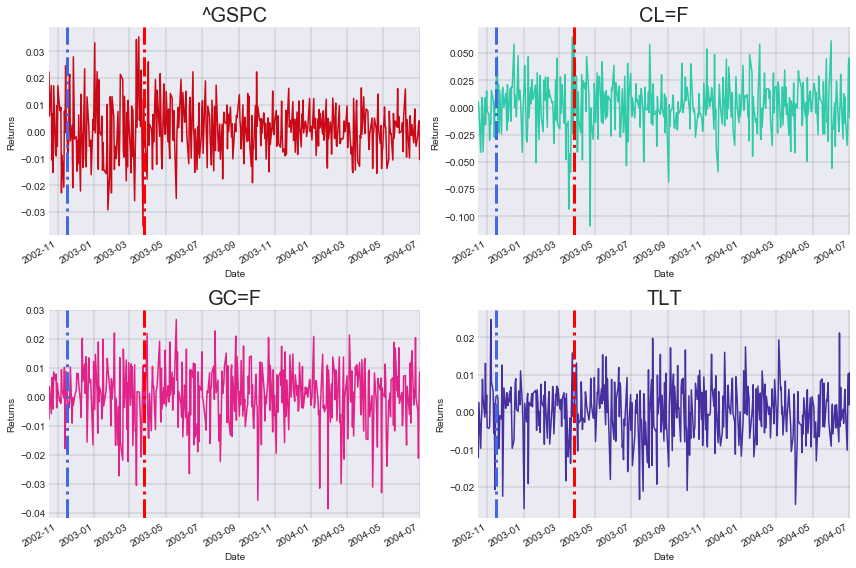

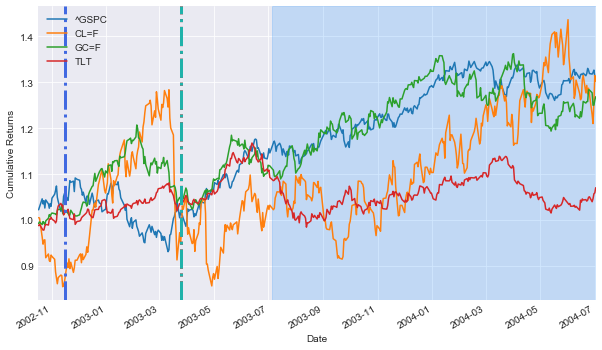

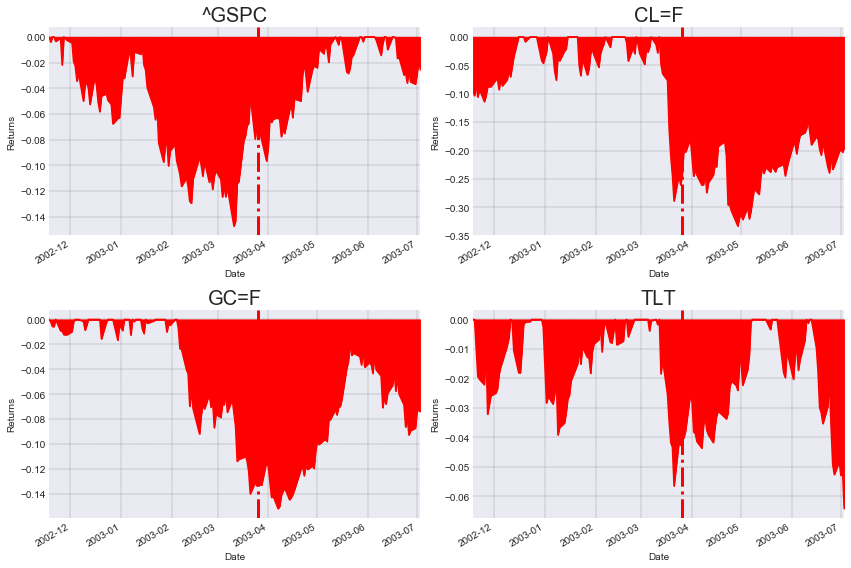

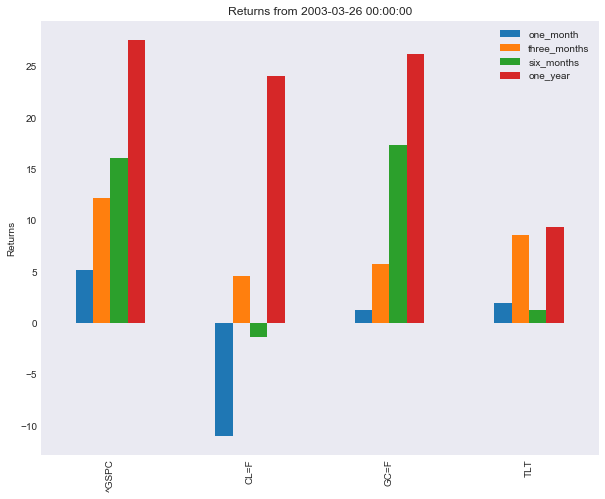

       one_month  three_months  six_months   one_year
^GSPC   5.160068     12.112190   16.027357  27.500423
CL=F  -10.967515      4.610554   -1.362205  24.030735
GC=F    1.271575      5.752347   17.317594  26.158047
TLT     1.907801      8.537530    1.266431   9.319031
Correlation           ^GSPC      CL=F      GC=F       TLT
^GSPC  1.000000 -0.181062 -0.203443 -0.330837
CL=F  -0.181062  1.000000  0.198302  0.083989
GC=F  -0.203443  0.198302  1.000000  0.232991
TLT   -0.330837  0.083989  0.232991  1.000000


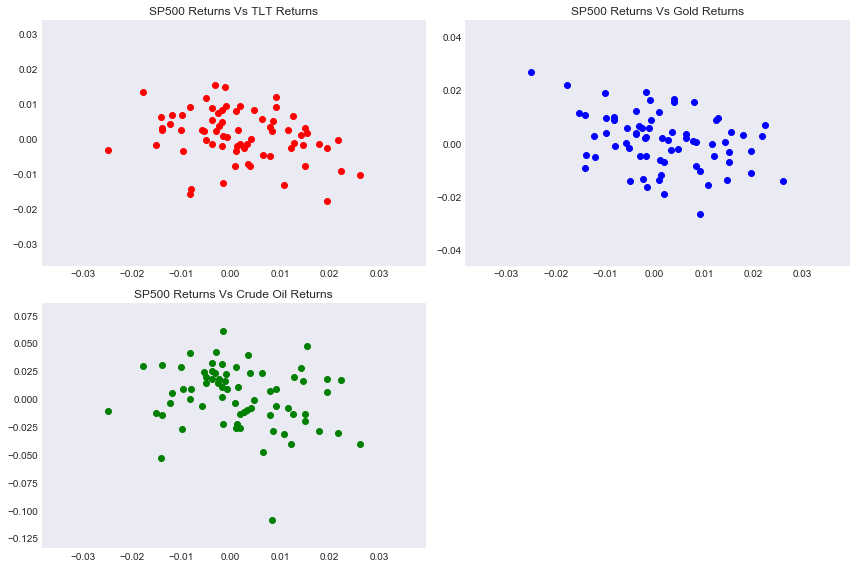

In [108]:
p = 'SARS'
print("---------------------------------")
print(p)
tl = timelines[timelines.pandemic_name == p]

print("---------------------------------")
data = get_data(tl)
print("---------------------------------")
print(data.head())

print("---------------------------------")
drawdown = calc_drawdown(data,tl)
print('Drawdowns', drawdown.min()*100)

print("---------------------------------")
print(plot_analytics(data, tl))
try:
    if data.shape[1] > 1:
        plot_scatter(data,tl)
    plot_sector(tl)
except Exception as e:
    pass

This notebook is only for illustration purpose and can guarantee no actual prediction for future development of the markets given the uncertain COVID-19 situation. 

Yet it was really fascinating to look into these data and perform time series analysis with visualizations to explore the relationship and impacts of pandemics on global markets.